# Lab 1: Least Squares 

**A note on this document**
This document is known as a Jupyter notebook; it allows text and executable code to coexist in a very easy-to-read format. Blocks can contain text or executable code. For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

## Least Sqaures Regression

We need to solve a least squares regression problem to find a linear equation that best fits the measured data. Let the measured data is given by $\mathbf{y} = (y_1, y_2, \cdots, y_n)$ and the corresponding values are given by $\mathbf{x} = (x_1, x_2, \cdots, x_n)$.

The goal is to find $m$ and $b$ such that $y = mx + b$ best approximates the linear relationship between $x$ and $y$.

Let's first plot the data

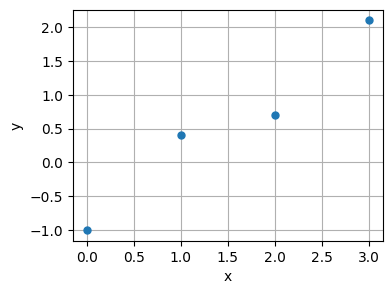

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.4, 0.7, 2.1])

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot()

plt.plot(x, y, "o", markersize=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

First, we can rewrite the line equation as $y = \mathbf{c} \cdot \mathbf{q}$, where

$\mathbf{c} = \begin{bmatrix} x & 1\end{bmatrix}$ and $\mathbf{q} = \begin{bmatrix} m \\ b\end{bmatrix} $. That is,

$y = mx + b = \begin{bmatrix} x & 1\end{bmatrix} \begin{bmatrix} m \\ b\end{bmatrix} = \mathbf{c} \cdot \mathbf{q}$ 

Given $\mathbf{x} = (x_1, x_2, \cdots, x_n)$ and $\mathbf{y} = (y_1, y_2, \cdots, y_n)$, we can obtain

$\begin{bmatrix} -1 \\ 0.4 \\ 0.7 \\ 2.1\end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\2 & 1 \\3 & 1 \end{bmatrix} \begin{bmatrix} m \\ b\end{bmatrix}$  or $\mathbf{y} = C\mathbf{q}$, 

where

$C = \begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\x_3 & 1 \\x_4 & 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\2 & 1 \\3 & 1 \end{bmatrix} $.

We can create the $C$ matrix using `np.vstack`

In [9]:
# x is a row vector.
# Use vstack to append a row vector, [1, 1, ,,, 1] at the end of x.
# It will be a 2 by n matrix.
# We need to transpose the 2 by n matrix to make it an n by 2 matrix
C = np.vstack([x, np.ones(len(x))]).T
print(C)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


Now use `np.linalg.lstsq` to solve for $\mathbf{q}$:

In [10]:
q = np.linalg.lstsq(C, y, rcond=None)[0]
print(q)
# or you can use
m, b = np.linalg.lstsq(C, y, rcond=None)[0]
print(m, b)

[ 0.96 -0.89]
0.9599999999999999 -0.8899999999999998


With $m=0.96$ and $b=-0.89$, the best fitting line is

$y = 0.96x-0.89$

Let's plot the line, $y = mx + b$ along with the data.

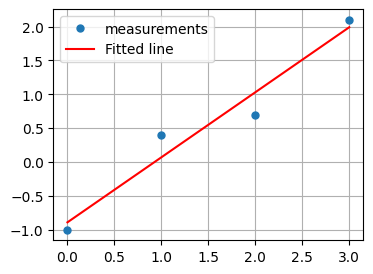

In [11]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot()

plt.plot(x, y, "o", label="measurements", markersize=5)
plt.plot(x, m * x + b, "r", label="Fitted line")
plt.legend()
plt.grid(True)
plt.show()

## Free fall example


Thoroughly go through the contents of `falling_body.ipynb` notebook to gain insight into three distinct techniques used for curve fitting.

## 🚚 Deliverables

**Push your code to your repo and submit the output plot in Gradescope.**

### Deliverable 1

Suppose you have a capacitor and you're aiming to determine its value. To do this, you set up an RC circuit and supplied it with a 5V DC voltage. After waiting for a few seconds to fully charge the capacitor, you disconnected the power source and gauged the voltage across the capacitor.

<div>
<center>
<img src="./figures/RC_Circuit.png" width="200"/>
</center>
</div>

The voltage across a capacitor in an RC circuit adheres to the equation
$v(t) = v_0 e^{-t/\tau}, t\geq 0$

Your task is to identify the time constant $\tau$ that most accurately aligns with this model. Additionally, assuming the circuit's resistor measures 1 $k\Omega$, determine the capacitor's value.    

- Hint 1: The time constant in an RC circuit is $\tau = RC$. 
- Hint 2: Use the logarithm to find a linear function of $\tau$.
- Hint 3: The initial voltage across the capacitor is $5$ V, i.e., $v_0 =5$ V

Use the following measurements of $v(t)$.

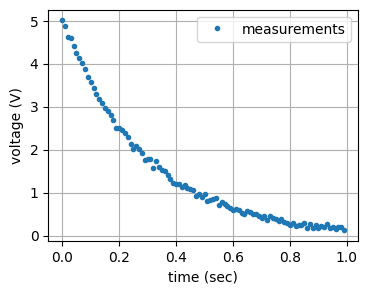

In [12]:
t = np.arange(0, 1, 0.01)

v = np.array(
    [
        5.01244283,
        4.88438776,
        4.61866927,
        4.60894011,
        4.41004693,
        4.23826769,
        4.14274337,
        4.00588297,
        3.88199414,
        3.70225232,
        3.58355439,
        3.43455927,
        3.30474357,
        3.18078036,
        3.07476507,
        2.96726969,
        2.89063642,
        2.80789063,
        2.69423508,
        2.49191736,
        2.50954028,
        2.44712497,
        2.38835945,
        2.30025698,
        2.13790825,
        2.01659547,
        2.07912399,
        2.00577069,
        1.92508211,
        1.7565095,
        1.7865158,
        1.78987426,
        1.56199575,
        1.72613664,
        1.58584813,
        1.51952741,
        1.49326173,
        1.40786616,
        1.32605959,
        1.22720959,
        1.19448915,
        1.20467148,
        1.12784961,
        1.1784009,
        1.10309822,
        1.09199671,
        1.05440677,
        0.92322795,
        0.95694284,
        0.90854489,
        0.97174071,
        0.81287511,
        0.82147023,
        0.8520071,
        0.86750312,
        0.70163675,
        0.77931194,
        0.73922824,
        0.69029541,
        0.6377564,
        0.58477345,
        0.61595619,
        0.59972651,
        0.51719116,
        0.50915179,
        0.57589605,
        0.5485081,
        0.51194423,
        0.50774903,
        0.46536343,
        0.40064362,
        0.4548967,
        0.37060314,
        0.44504432,
        0.40862983,
        0.38155415,
        0.32950763,
        0.38447669,
        0.31214141,
        0.29181047,
        0.24943998,
        0.28925818,
        0.22684326,
        0.25104928,
        0.24648863,
        0.29750812,
        0.16686111,
        0.26215788,
        0.17941954,
        0.25641971,
        0.17907152,
        0.22507161,
        0.1988562,
        0.26396801,
        0.17906211,
        0.18801865,
        0.16303685,
        0.19193568,
        0.18761862,
        0.12386653,
    ]
)

# plot the data
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot()
plt.plot(t, v, "o", label="measurements", markersize=3)
plt.legend()
plt.xlabel("time (sec)")
plt.ylabel("voltage (V)")
plt.grid(True)

The voltage across the capacitor is given by $v(t) = v_0 e^{-t/\tau}$, which is a nonlinear function of $\tau$. By taking the logarithm on both side, we derive

$ \log (\frac{v}{v_0}) = -t/\tau$

Rearranging the equation yields

$ t = -\log (\frac{v}{v_0}) \tau$

As a result, the measuremts can be redefined in terms of $t$ and $\mathbf{x} \coloneqq -\log (\frac{\mathbf{v}}{v_0})$.  With this, we can establish a linear equation of $\tau$ given by

$ \mathbf{t} = \mathbf{x} \tau$, 

where $\mathbf{t} \in \mathbb{R}^n$ and $\mathbf{x} \in \mathbb{R}^n$ represents measurement vectors of dimensions $n\times 1$.





In [21]:
# Add your code to find the optimal value of the time constant, \tau


# print the time constant
print(tau)

# find the capacitor value for R = 1K.


# plot the measured data along with the fitted line.
# Don't forget to add labels, units, and legend.

0.2858986310259258


Report the time constant $\tau$ and the capacitance $C$ and submit a plot of the fitted line with the measurements. 

### Deliverable 2

The following data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [22]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()
housing.head()  # The first five rows of data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Let's look at the data size.

In [15]:
len(housing)

20640

Since the dataset includes graphical information (latitude and longitude), it is good idea to create a scatterplot of all the districts to visualize the data. In particular, we are interested in the median income, population, and median house value.

<Axes: xlabel='longitude', ylabel='latitude'>

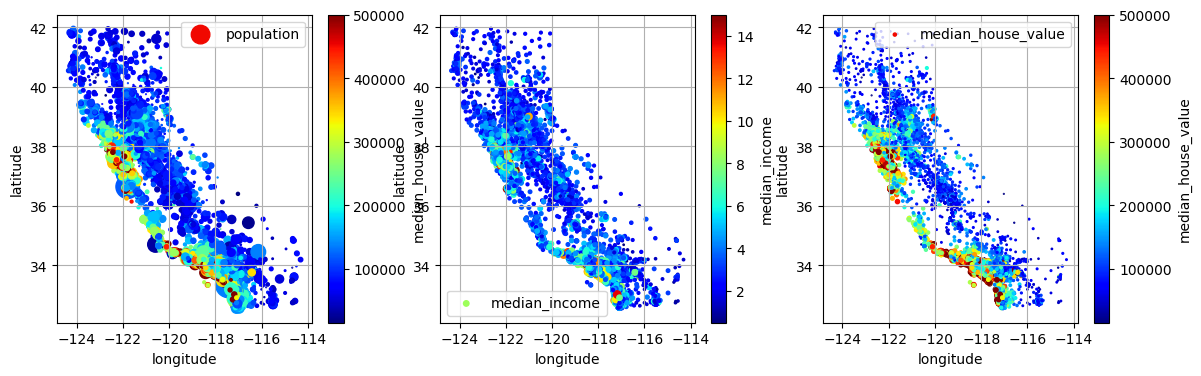

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axes = plt.subplots(nrows=1, ncols=3)


housing.plot(
    ax=axes[0],
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["population"] / 100,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(14, 4),
)
housing.plot(
    ax=axes[1],
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["median_income"] * 2,
    label="median_income",
    c="median_income",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(14, 4),
)
housing.plot(
    ax=axes[2],
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["median_house_value"] / 50000,
    label="median_house_value",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(14, 4),
)

In [17]:
value = housing["median_house_value"]
population = housing["population"]
income = housing["median_income"]

Our objective is to predict the value of houses in a specific neighborhood based on the population and median income. The linear model we're interested in can be expressed as:

$v = w_2 * x + w_1 * y + w_0$

where $v$ represents the house value; $x$ represents the median income, and $y$ represents the population.  Essentially, our aim is to determine the values of  $\mathbf{w} = [w_2 \quad w_1 \quad w_0]^\top$ that minimize the disparities between the training set and the model's predictions.

To begin, let's establish a linear relationship:

$\mathbf{v} = C \mathbf{w}$.



In [ ]:
# Construct the C matrix

Utilize the least square estimation technique to determine the coefficients of the linear equation, $\mathbf{w}$.

In [26]:
w = [0, 0, 0]  # replace this line
print(w)

[0, 0, 0]


Let's plot the model in 3D.

Text(0.5, 0, 'meadian house value')

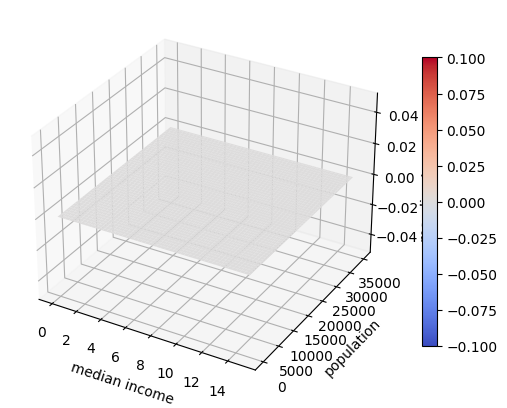

In [27]:
# plot the surface
from matplotlib import cm

x = np.linspace(0, 15, 100)
y = np.linspace(0, 35000, 100)

x, y = np.meshgrid(x, y)

z = w[2] * x + w[1] * y + w[0]

plt3d = plt.figure(figsize=(7, 5))
ax = plt3d.add_subplot(projection="3d")
surf = ax.plot_surface(x, y, z, alpha=1, cmap=cm.coolwarm)
plt3d.colorbar(surf, shrink=0.75)
ax.set_xlabel("median income")
ax.set_ylabel("population")
ax.set_zlabel("meadian house value")

In Gradescope, submit the above plot and provide a concise explanation of how the population is related to the house values, as well as how the median income is linked to the house values.